In [ ]:
# installare (se necessario) e importare GeoPandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# caricare il geodataset delle piste ciclabili bike_ciclabili.zip

In [ ]:
# visualizzaere il geodataset delel piste ciclabili

In [ ]:
!pip install GeoPandas
import geopandas
import pandas as pd


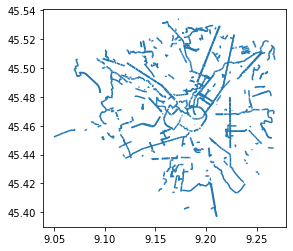

In [ ]:
Ciclabili = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/Data/bike_ciclabili.zip')
Ciclabili.plot()

In [ ]:
# caricare il geodataset dei quartieri di Milano ds964_nil_wm.zip

In [ ]:
# installare (se necessario) e importare contextily e visualizzare la mappa di Milano con l'indicazione dei quartieri in nero (solo confini)
# e le piste ciclabili

In [ ]:
!pip install contextily
import contextily as ctx


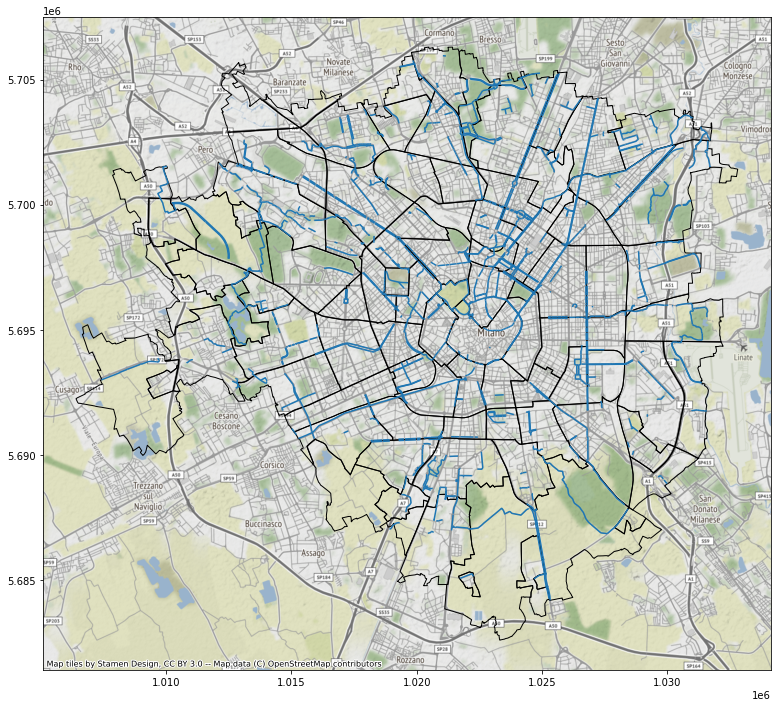

In [ ]:
Quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/Geopandas Esercizi/Data/ds964_nil_wm.zip')
ax = Quartieri.to_crs(3857).plot(facecolor='none',edgecolor='k',figsize=(20,12))
ax = Ciclabili.to_crs(3857).plot(ax=ax,figsize=(20,12))
ctx.add_basemap(ax)

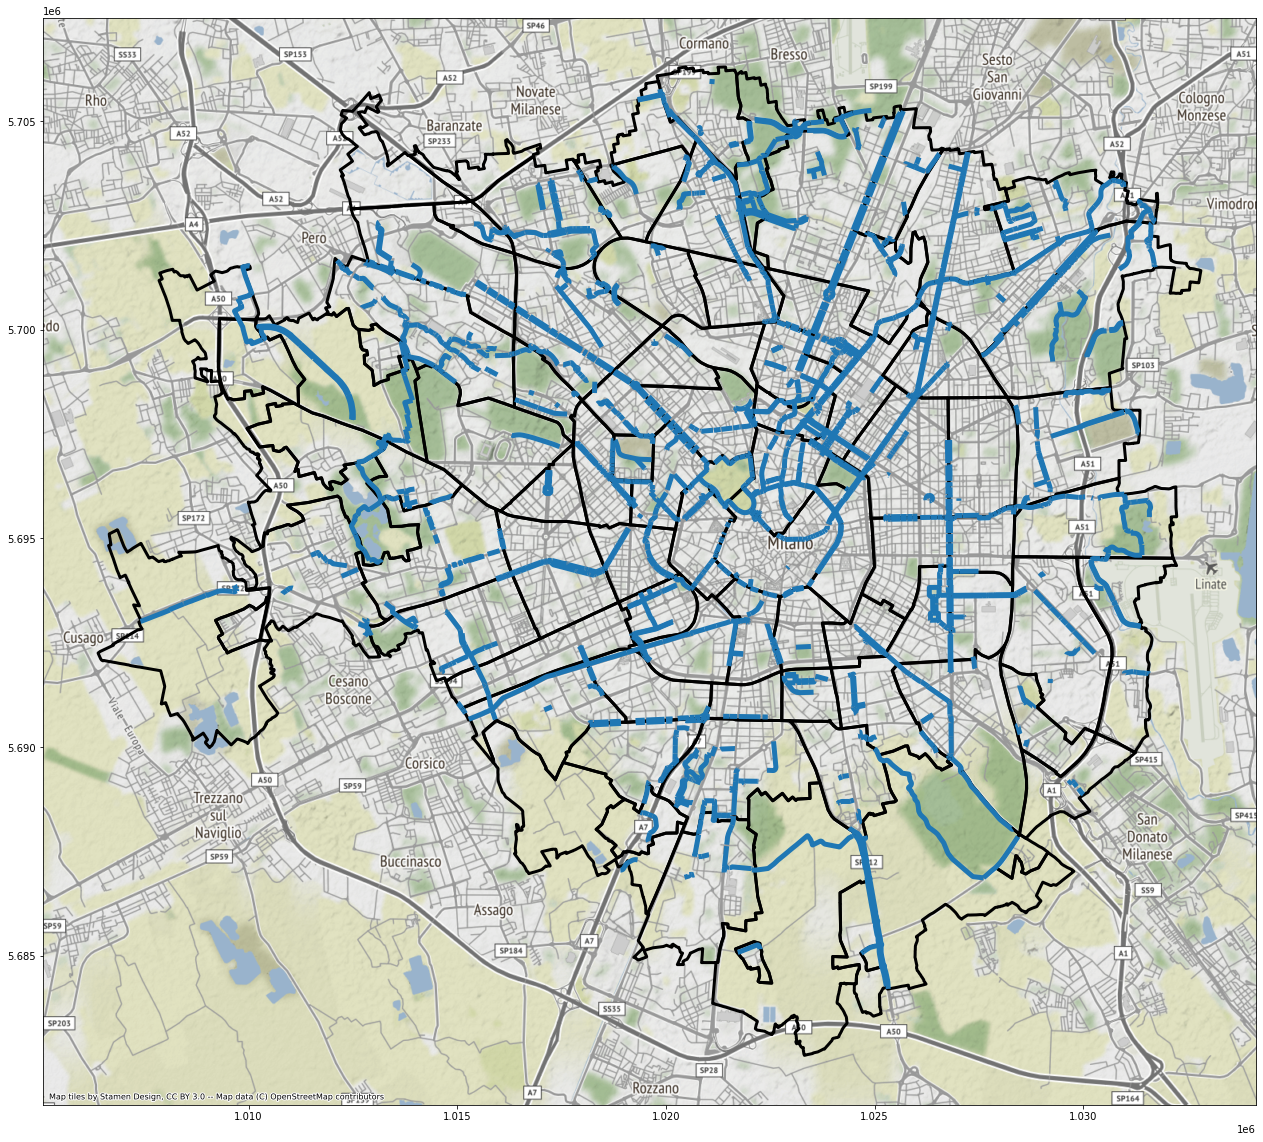

In [ ]:
# trovare il quartiere meno esteso
PiuPiccolo=Quartieri[Quartieri['Shape_Area']==Quartieri.Shape_Area.min()]
PiuPiccolo

ID_NIL  ...                                           geometry
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...

[1 rows x 9 columns]

In [ ]:
# trovare il quartiere più esteso
PiuGrande=Quartieri[Quartieri['Shape_Area']==Quartieri.Shape_Area.max()]
PiuGrande

ID_NIL  ...                                           geometry
55      85  ...  POLYGON ((9.21711 45.43187, 9.21733 45.43160, ...

[1 rows x 9 columns]

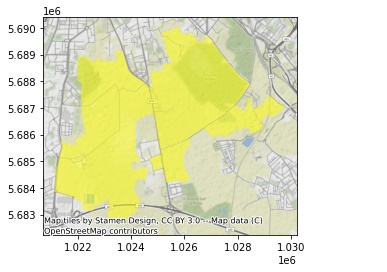

In [ ]:
# visualizzare i due quartieri sulla mappa di Milano con i colori indicati nella figura sotto
ax=PiuGrande.to_crs(3857).plot(facecolor='yellow',alpha=0.5)
ax=PiuPiccolo.to_crs(3857).plot(ax=ax,facecolor='yellow',alpha=0.5)
ctx.add_basemap(ax)

In [ ]:
# salvare in un geodataframe le informazioni sul quartiere di Affori, prendendole dal geodataframe dei quartieri

In [ ]:
Affori = Quartieri[Quartieri['NIL'] == 'AFFORI']
Affori

ID_NIL     NIL  ... OBJECTID                                           geometry
69      80  AFFORI  ...      158  POLYGON ((9.17767 45.51899, 9.17796 45.51848, ...

[1 rows x 9 columns]

In [ ]:
# trovare le piste ciclabili che passano per il quartiere di Affori

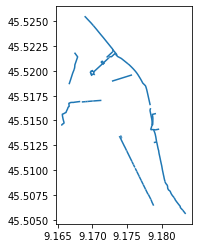

In [ ]:
CiclaAffori = Ciclabili[Ciclabili.intersects(Affori.geometry.squeeze())]
CiclaAffori.plot()

In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto

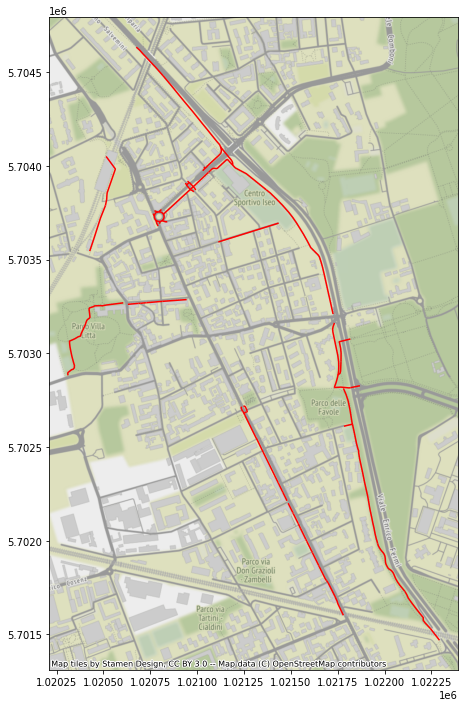

In [ ]:
ax = CiclaAffori.to_crs(3857).plot(edgecolor='red',figsize=(20,12))
ctx.add_basemap(ax)